In [1]:
import pandas as pd
customers_data=pd.read_csv("/Mall_Customers.csv")

### STEP 1:

In [2]:
customers_data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
customers_data.shape

(200, 5)

In [4]:
customers_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
customers_data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### STEP 2:

In [7]:
customers_data['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
customers_data['Genre']= label_encoder.fit_transform(customers_data['Genre'])

customers_data['Genre'].unique()


array([1, 0])

### STEP 3:

In [9]:
customers_data.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [10]:
customers_data.var()

CustomerID                3350.000000
Genre                        0.247638
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

### STEP 4:

In [11]:
customers_data.skew()

CustomerID                0.000000
Genre                     0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

### STEP 5:

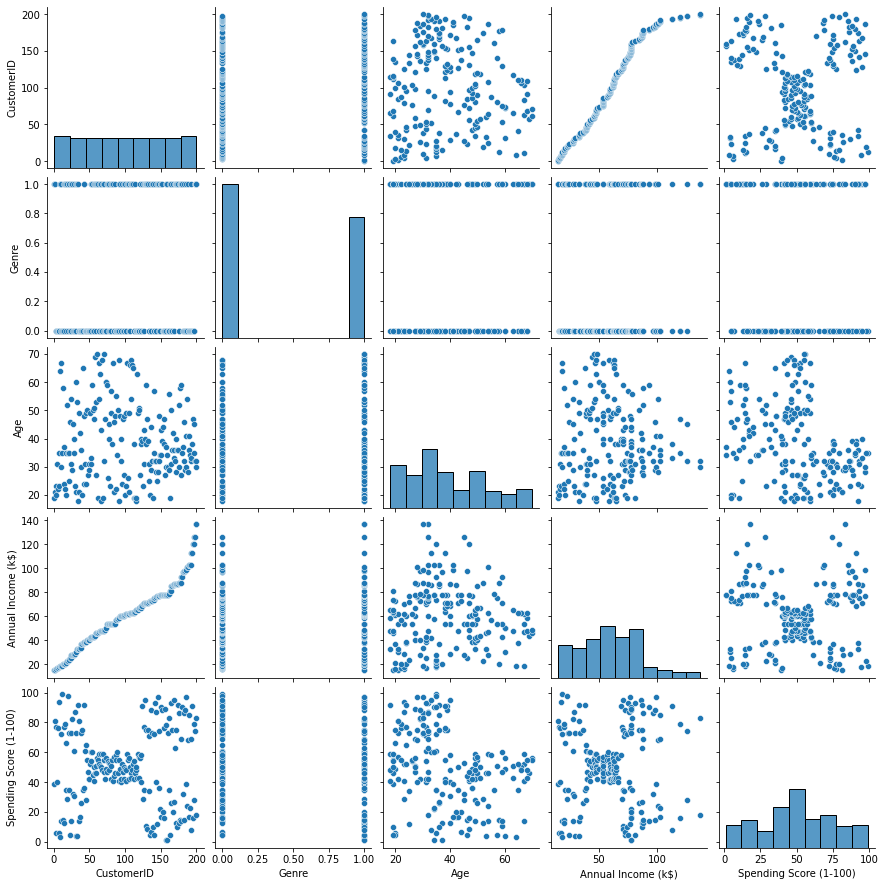

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(customers_data)
plt.show()

### STEP 6:

In [13]:
from sklearn.cluster import KMeans
customers_data.drop(['CustomerID'],axis=1,inplace=True)

kmeans = KMeans(n_clusters=5)



In [14]:
kmeans.fit(customers_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [15]:
kmeans.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [16]:
kmeans.cluster_centers_

array([[ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348]])

### STEP 7:

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

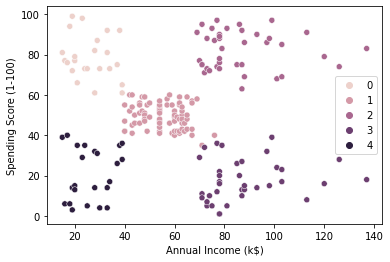

In [17]:
import seaborn as sns
sns.scatterplot(customers_data['Annual Income (k$)'],customers_data['Spending Score (1-100)'],hue=kmeans.labels_)


STEP 8:

In [20]:
kmeans2=KMeans(n_clusters=5,init='k-means++')
kmeans2.fit(customers_data)
pred=kmeans2.predict(customers_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
frame=pd.DataFrame(customers_data)
frame['cluster']=pred

In [29]:
frame.cluster.value_counts()

3    79
2    39
0    36
4    23
1    23
Name: cluster, dtype: int64

In [31]:
C0 = customers_data[customers_data['cluster'] == 0]
C1 = customers_data[customers_data['cluster'] == 1]
C2 = customers_data[customers_data['cluster'] == 2]
C3 = customers_data[customers_data['cluster'] == 3]
C4 = customers_data[customers_data['cluster'] == 4]

In [32]:
import statistics as ss
print('Average Age : ',C0['Age'].mean())
print('Average Annual Income : ',C0['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C0['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C0.shape)

Average Age :  40.666666666666664
Average Annual Income :  87.75
Deviation of the mean for annual Income :  16.387059354433127
No. of Customers ie shape : (36, 5)


In [34]:
print('From those Customers We have',C0.Genre.value_counts()[1],'male and',C0.Genre.value_counts()[0])

From those Customers We have 19 male and 17


In [63]:
print('Average Age : ',C1['Age'].mean())
print('Average Annual Income : ',C1['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C1['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C1.shape)
print('From those Customers We have',C1.Genre.value_counts()[1],'male and',C1.Genre.value_counts()[0],'female')

Average Age :  25.52173913043478
Average Annual Income :  26.304347826086957
Deviation of the mean for annual Income :  7.893811054517766
No. of Customers ie shape : (23, 5)
From those Customers We have 9 male and 14 female


In [37]:
print('Average Age : ',C2['Age'].mean())
print('Average Annual Income : ',C2['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C2['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C2.shape)
print('From those Customers We have',C2.Genre.value_counts()[1],'male and',C2.Genre.value_counts()[0])

Average Age :  32.69230769230769
Average Annual Income :  86.53846153846153
Deviation of the mean for annual Income :  16.312484972924967
No. of Customers ie shape : (39, 5)
From those Customers We have 18 male and 21


In [38]:
print('Average Age : ',C3['Age'].mean())
print('Average Annual Income : ',C3['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C3['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C3.shape)
print('From those Customers We have',C3.Genre.value_counts()[1],'male and',C3.Genre.value_counts()[0])

Average Age :  43.08860759493671
Average Annual Income :  55.29113924050633
Deviation of the mean for annual Income :  8.710665285219767
No. of Customers ie shape : (79, 5)
From those Customers We have 33 male and 46


In [39]:
print('Average Age : ',C4['Age'].mean())
print('Average Annual Income : ',C4['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C4['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C4.shape)
print('From those Customers We have',C4.Genre.value_counts()[1],'male and',C4.Genre.value_counts()[0])

Average Age :  45.21739130434783
Average Annual Income :  26.304347826086957
Deviation of the mean for annual Income :  7.893811054517766
No. of Customers ie shape : (23, 5)
From those Customers We have 9 male and 14


STEP 9

In [42]:
import warnings 
warnings.filterwarnings('ignore')
SSE = []
for clust in range(1,20):
  KM = KMeans(n_clusters= clust, init='k-means++')
  KM = KM.fit(customers_data)
  SSE.append(KM.inertia_)

Text(0, 0.5, 'Inertia')

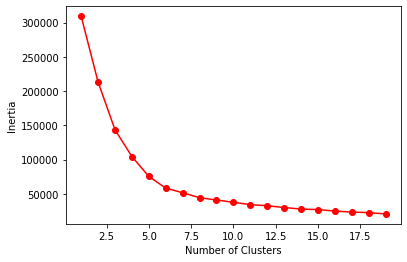

In [44]:
import numpy as np
plt.plot(np.arange(1,20), SSE,'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

STEP -10

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2)
_PCA = pca.fit_transform(customers_data)
PCA_Components = pd.DataFrame(_PCA)

In [47]:
PCA_Components

,0,1
0,-32.239124,-32.677488
1,0.174246,-56.813777
2,-57.561223,-12.526347
3,-2.722606,-53.418441
4,-32.516575,-30.063812
...,...,...
195,58.676656,30.375683
196,20.641540,66.253724
197,58.923482,37.701190
198,21.851920,79.171501


In [48]:
KM1 = KMeans(n_clusters=5)
KM1.fit(PCA_Components)
KM1.cluster_centers_

array([[ -4.4528129 ,  -3.06674783],
       [ 41.56691811,   1.41968797],
       [ -9.74319378,  42.47460159],
       [  4.50257008, -46.69336641],
       [-44.51161311,  -9.59899574]])

In [49]:
KM1.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

STEP 11

<AxesSubplot:xlabel='0', ylabel='1'>

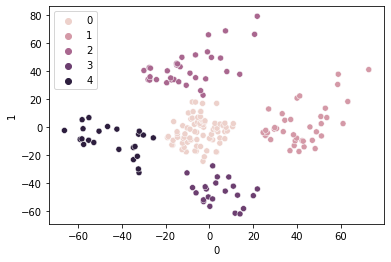

In [50]:
sns.scatterplot(PCA_Components[0], PCA_Components[1], hue=KM1.labels_)

STEP 12

In [51]:
from sklearn.cluster import MeanShift, AgglomerativeClustering

In [52]:
MS = MeanShift(bandwidth = 50)
MS.fit(PCA_Components)
MS.cluster_centers_

array([[ 0.3041935 , -4.11079324]])

<AxesSubplot:xlabel='0', ylabel='1'>

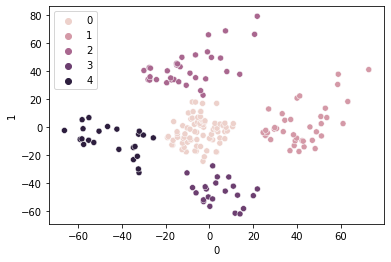

In [53]:
sns.scatterplot(PCA_Components[0], PCA_Components[1], hue=KM1.labels_)

STEP 13

In [55]:
AC = AgglomerativeClustering(n_clusters = 5, linkage='ward',compute_full_tree=True)
AC.fit(customers_data)

AgglomerativeClustering(compute_full_tree=True, n_clusters=5)

In [56]:
AC.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [57]:
customers_data['Cluster'] = AC.labels_

In [58]:
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy

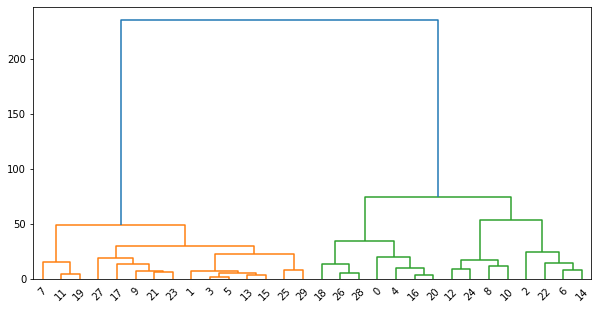

In [59]:
Z = hierarchy.linkage(customers_data[:30], 'ward')
plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(Z)

STEP 14

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

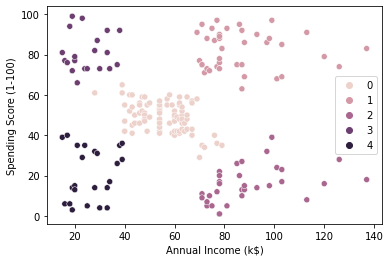

In [62]:
sns.scatterplot(customers_data['Annual Income (k$)'], customers_data['Spending Score (1-100)'], hue=AC.labels_)